In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import itertools
from pathlib import Path
from PIL import Image
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.keras.layers import Dropout, Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model

In [2]:
# return the current working directory
cwd = os.getcwd() 
print("Current working directory:", cwd)

Current working directory: d:\Học tập 3\Digital_Processing\Project2\utkcropped


In [3]:
age = []
gender = [] 
images_path_names = []
 
# add data into 3 lists above to prepare data for training
# take label from file name with format age_gender_datatime
for filename in os.listdir(cwd):
    image_path = os.path.join(cwd, filename)
    try:
        elements=  filename.split('_')
        age.append(int(elements[0]))
        gender.append(int(elements[1]))
        images_path_names.append(image_path)
    except:
        pass

In [4]:
# create dataframe
df = pd.DataFrame({"dir":images_path_names,"age":age,"gender":gender})
df.head()

,dir,age,gender
0,d:\Học tập 3\Digital_Processing\Project2\utkcr...,100,0
1,d:\Học tập 3\Digital_Processing\Project2\utkcr...,100,0
2,d:\Học tập 3\Digital_Processing\Project2\utkcr...,100,1
3,d:\Học tập 3\Digital_Processing\Project2\utkcr...,100,1
4,d:\Học tập 3\Digital_Processing\Project2\utkcr...,100,1


In [5]:
gender_dict = {0:"Male",1:"Female"}

In [6]:
df = df.astype({'age':'float32', 'gender': 'int32'})
print(df.dtypes)

dir        object
age       float32
gender      int32
dtype: object


In [7]:
# divide train, test data
train, test = train_test_split(df, test_size=0.85, random_state=100)

In [8]:
# preprocess image for train
x_train = []
for file in train.dir:
    img = load_img(file, grayscale=True)
    img = img.resize((128,128), Image.ANTIALIAS)
    img = np.array(img)
    x_train.append(img)

x_train = np.array(x_train)

x_train = x_train.reshape(len(x_train), 128,128,1)

c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\image_utils.py:382: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [10]:
tf.config.experimental.get_memory_info('GPU:0')['current'] / 10**9

0.0

In [11]:
# preprocess data for test
x_test = []
for file in test.dir:
    img = load_img(file, grayscale=True)
    img = img.resize((128,128), Image.ANTIALIAS)
    img = np.array(img)
    x_test.append(img)

x_test = np.array(x_test[:1000])

x_test = x_test.reshape(len(x_test), 128,128,1)
x_test = x_test/255

In [12]:
tf.config.experimental.get_memory_info('GPU:0')['current'] / 10**9

0.0

In [9]:
# create data, label for train
x_train = x_train/255
y_gender = np.array(train.gender)

In [14]:
tf.config.experimental.get_memory_info('GPU:0')['current'] / 10**9

0.0

In [10]:
# CNN 
input_size = (128,128,1)
inputs = Input((input_size))

## convolution layer with kernel size = 3
X = Conv2D(64, (3, 3), activation='relu', kernel_initializer = glorot_uniform(seed=0))(inputs)
X = BatchNormalization(axis = 3)(X)
X = MaxPooling2D((3, 3))(X)

X = Conv2D(128, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)

X = Conv2D(256, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)

X = Flatten()(X)

# fully connected layer with one dense 256 node and one dense 1 node to regression output male or female
dense_1 = Dense(256, activation='relu')(X)
dropout_1 = Dropout(0.4)(dense_1)

output_1 = Dense(1,activation='sigmoid', name='gender_output')(dropout_1)

model = Model(inputs=[inputs], outputs=[output_1])

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 64)      640       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 128)      0     

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
tf.config.experimental.get_memory_info('GPU:0')['current'] / 10**9

0.022721536

In [13]:
# training model
model_history = model.fit(x=x_train, y=y_gender, batch_size = 10, epochs=20, validation_split= 0.1)

Epoch 1/20
320/320 [==============================] - 20s 31ms/step - loss: 0.5877 - accuracy: 0.7091 - val_loss: 0.6022 - val_accuracy: 0.7444
Epoch 2/20
320/320 [==============================] - 9s 29ms/step - loss: 0.4436 - accuracy: 0.7956 - val_loss: 0.4613 - val_accuracy: 0.7612
Epoch 3/20
320/320 [==============================] - 9s 29ms/step - loss: 0.3732 - accuracy: 0.8297 - val_loss: 0.4704 - val_accuracy: 0.7781
Epoch 4/20
320/320 [==============================] - 9s 29ms/step - loss: 0.3418 - accuracy: 0.8400 - val_loss: 0.4426 - val_accuracy: 0.7893
Epoch 5/20
320/320 [==============================] - 9s 29ms/step - loss: 0.3130 - accuracy: 0.8603 - val_loss: 0.4739 - val_accuracy: 0.7837
Epoch 6/20
320/320 [==============================] - 9s 29ms/step - loss: 0.2888 - accuracy: 0.8653 - val_loss: 0.4661 - val_accuracy: 0.8146
Epoch 7/20
320/320 [==============================] - 9s 28ms/step - loss: 0.2797 - accuracy: 0.8741 - val_loss: 0.5059 - val_accuracy: 0.797

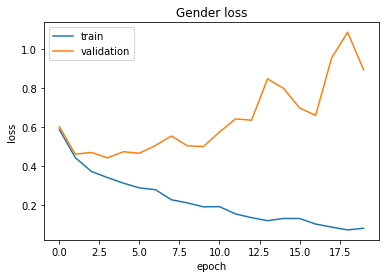

In [15]:
# visualize loss during 30 epochs
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Gender loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

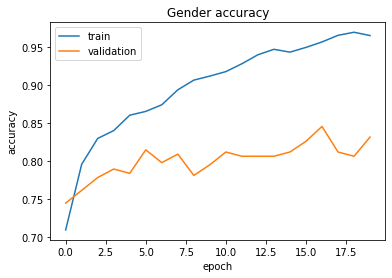

In [16]:
# visualize accuracy during 30 epochs
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Gender accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [22]:
# defining a function to plot the confusion matrix in a grid for easier visualization
"""
this function prints and plots the confusion matrix
normalization can be applied by setting normalize=True
"""
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', export_as='confusion_matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True labels', fontsize=14)
    plt.xlabel('Predicted labels', fontsize=14)

    # exporting plot image in PNG format.
    plt.savefig(f'd:/Học tập 3/Digital_Processing/Project2/utkcropped/output/cnn_logs/{export_as}.png', bbox_inches='tight');

In [26]:
model = load_model("d:/Học tập 3/Digital_Processing/Project2/utkcropped/output/cnn_logs/model_20_epochs_gender_98.h5")

In [27]:
# calculate confusion matrix after 30 epochs
maxt1 = confusion_matrix(test.gender.iloc[:1000],model.predict(x_test)[:,0].astype("int32"))
maxt1

32/32 [==============================] - 1s 31ms/step


array([[525,   1],
       [378,  96]], dtype=int64)

Normalized confusion matrix


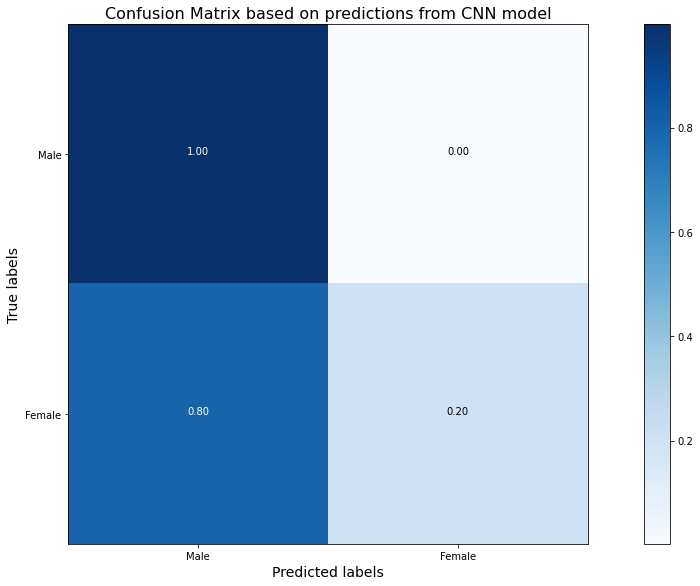

In [28]:
gender_classes = ["Male","Female"]
plt.figure(figsize=(16,8))
plot_confusion_matrix(maxt1, gender_classes, normalize=True,
                      title="Confusion Matrix based on predictions from CNN model",
                      export_as="confusion_matrix_after_30_epochs"
                     )

plt.show()

In [14]:
# save parameter after training 30 epochs
model.save("d:/Học tập 3/Digital_Processing/Project2/utkcropped/output/cnn_logs/model_20_epochs_gender.h5", save_format='h5')